In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import string
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import nltk
import re
import tensorflow as tf

# add datasets
data = pd.read_csv("/content/drive/MyDrive/LLM DATA SETS/Dataset_Finetuning.csv")

# convert labels to numeric values
data['output'] = data['output'].apply(lambda s: 0 if s == 'NO' else 1)
data

,instruction,input,output
0,Categorize the essay into two categories as to...,California is the biggest example of city plan...,1
1,Categorize the essay into two categories as to...,A life without cars sure sounds like a great i...,0
2,Categorize the essay into two categories as to...,Cars are used used in everyday life but they m...,0
3,Categorize the essay into two categories as to...,The electoral collage should be disbanded. Not...,0
4,Categorize the essay into two categories as to...,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...,...
2489,Categorize the essay into two categories as to...,"Dear Florida senator, It is in the interest of...",0
2490,Categorize the essay into two categories as to...,Driving can be a huge hassle. Having to spend ...,0
2491,Categorize the essay into two categories as to...,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,Categorize the essay into two categories as to...,"The electoral college is pointless, I believe ...",0


In [3]:
data

,instruction,input,output
0,Categorize the essay into two categories as to...,California is the biggest example of city plan...,1
1,Categorize the essay into two categories as to...,A life without cars sure sounds like a great i...,0
2,Categorize the essay into two categories as to...,Cars are used used in everyday life but they m...,0
3,Categorize the essay into two categories as to...,The electoral collage should be disbanded. Not...,0
4,Categorize the essay into two categories as to...,"Dear Mr.Mrs. Senator, The Electoral College is...",0
...,...,...,...
2489,Categorize the essay into two categories as to...,"Dear Florida senator, It is in the interest of...",0
2490,Categorize the essay into two categories as to...,Driving can be a huge hassle. Having to spend ...,0
2491,Categorize the essay into two categories as to...,"Dear\nSenator,\n\nI am writing to express my o...",1
2492,Categorize the essay into two categories as to...,"The electoral college is pointless, I believe ...",0


In [4]:
# Save the DataFrame to a new CSV file
data.to_csv('/content/drive/MyDrive/LLM DATA SETS/GYANDEEPDATASET.csv', index=False)


In [5]:
data['output'] = data['output'].astype(float)

In [6]:
data

,instruction,input,output
0,Categorize the essay into two categories as to...,California is the biggest example of city plan...,1.0
1,Categorize the essay into two categories as to...,A life without cars sure sounds like a great i...,0.0
2,Categorize the essay into two categories as to...,Cars are used used in everyday life but they m...,0.0
3,Categorize the essay into two categories as to...,The electoral collage should be disbanded. Not...,0.0
4,Categorize the essay into two categories as to...,"Dear Mr.Mrs. Senator, The Electoral College is...",0.0
...,...,...,...
2489,Categorize the essay into two categories as to...,"Dear Florida senator, It is in the interest of...",0.0
2490,Categorize the essay into two categories as to...,Driving can be a huge hassle. Having to spend ...,0.0
2491,Categorize the essay into two categories as to...,"Dear\nSenator,\n\nI am writing to express my o...",1.0
2492,Categorize the essay into two categories as to...,"The electoral college is pointless, I believe ...",0.0


In [7]:
# Remove punctuation and lowercase data
data['input'] = data['input'].apply(lambda s: s.translate(str.maketrans('', '', string.punctuation)))
data['input'] = data['input'].apply(lambda s: s.lower())

# Remove all non alphanumeric char
data["input"] = data["input"].apply(lambda s: re.sub(r'[^\w\s]', '', s))
data

,instruction,input,output
0,Categorize the essay into two categories as to...,california is the biggest example of city plan...,1.0
1,Categorize the essay into two categories as to...,a life without cars sure sounds like a great i...,0.0
2,Categorize the essay into two categories as to...,cars are used used in everyday life but they m...,0.0
3,Categorize the essay into two categories as to...,the electoral collage should be disbanded not ...,0.0
4,Categorize the essay into two categories as to...,dear mrmrs senator the electoral college is a ...,0.0
...,...,...,...
2489,Categorize the essay into two categories as to...,dear florida senator it is in the interest of ...,0.0
2490,Categorize the essay into two categories as to...,driving can be a huge hassle having to spend m...,0.0
2491,Categorize the essay into two categories as to...,dear\nsenator\n\ni am writing to express my op...,1.0
2492,Categorize the essay into two categories as to...,the electoral college is pointless i believe t...,0.0


In [ ]:
import spacy
from tqdm import tqdm

# load the spacy language model
nlp = spacy.load('en_core_web_sm')

# define a function to apply lemmatization to a sentence
def lemmatize_sentence(sentence):
    doc = nlp(sentence)
    lemmatized_sentence = " ".join([token.lemma_ for token in doc])
    return lemmatized_sentence

# create an empty list to store the lemmatized text
lemmatized_text = []

# apply the lemmatization function to the 'input' column with tqdm
for sentence in tqdm(data['input']):
    lemmatized_sentence = lemmatize_sentence(sentence)
    lemmatized_text.append(lemmatized_sentence)

# add the lemmatized text to the dataframe as a new column
data['text_lemmatized'] = lemmatized_text
data

 63%|██████▎   | 1578/2494 [02:26<02:16,  6.72it/s]

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# load the Snowball stemmer for English
stemmer = SnowballStemmer('english')

# define a function to apply stemming to a sentence
def stem_sentence(sentence):
    words = sentence.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence

# create an empty list to store the stemmed text
stemmed_text = []

# apply the stemming function to the 'input' column with tqdm
for sentence in tqdm(data['input']):
    stemmed_sentence = stem_sentence(sentence)
    stemmed_text.append(stemmed_sentence)

# add the stemmed text to the dataframe as a new column
data['text_stemmed'] = stemmed_text
data

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import TextVectorization

nlp = spacy.load('en_core_web_sm')

# Perform POS tagging using spaCy
pos_tags = []
for text in tqdm(data['input'], desc='POS tagging'):
    doc = nlp(text)
    tags = [token.pos_ for token in doc]
    pos_tags.append(tags)

# convert list of POS tags to a string
pos_strings = [' '.join(pos_list) for pos_list in pos_tags]
data['pos'] = pos_strings
data

In [ ]:
from tensorflow.keras.layers import TextVectorization

train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

train_tf = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_tf = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))
test_tf = tf.data.Dataset.from_tensor_slices((test_x, test_y))

train_dataset = train_tf.shuffle(buffer_size=10000).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
test_dataset = test_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)

vectorizer = TextVectorization(max_tokens=5000)
train_text = train_dataset.map(lambda input, output: text)
vectorizer.adapt(train_text)

model_RNN = tf.keras.Sequential([
    vectorizer,
    tf.keras.layers.Embedding(input_dim=len(vectorizer.get_vocabulary()), output_dim=64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_RNN.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(1e-4))
model_RNN.fit(train_dataset, epochs=20, validation_data=valid_dataset, validation_steps=20, callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))
test_loss, test_acc = model_RNN.evaluate(test_dataset)

model_RNN.summary()

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: ',test_acc)

In [14]:
# Save the model using the save method
model_RNN.save('/content/drive/MyDrive/TELUGU DATA SETS/model_RNN')


In [ ]:
# Save the model in TensorFlow SavedModel format
model_RNN.save('/content/drive/MyDrive/TELUGU DATA SETS/model_RNN', save_format='tf')


In [14]:
# Save the model weights
model_RNN.save_weights('/content/drive/MyDrive/RESEARCH -DATA 2023/model_RNN_weights.pt')


In [ ]:
model_RNN.save('/content/drive/MyDrive/TELUGU DATA SETS/model_RNN', save_format='tf')


In [17]:
# Remove the TextVectorization layer before saving
model_without_text_vectorization = tf.keras.Sequential(model_RNN.layers[1:])  # Assuming the TextVectorization layer is the first layer
model_without_text_vectorization.save('/content/drive/MyDrive/TELUGU DATA SETS/model_RNN.h5')


In [ ]:
# Save the model to a file using the SavedModel format
model_RNN.save('/content/drive/MyDrive/LLM DATA SETS/model_RNN', save_format='tf')


In [ ]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/LLM DATA SETS/model_RNN')

# Use the loaded model for predictions or further training
# Save the model weights
loaded_model.save_weights('/content/drive/MyDrive/LLM DATA SETS/model_RNN_weights.pt')

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, None)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, None, 64)          22656     
                                                                 
 bidirectional (Bidirection  (None, 128)               66048     
 al)                                                             
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 97025 (379.00 KB)
Trainable params: 97025 

In [12]:
test_x

2213    the advantages of limiting car usage are numer...
2072    in the modern world the use of cars has become...
1394    americas love affair with its vehicles seems t...
2152    letter to the state senator\n\nin americas ele...
1058    every day thousands of people lose their lives...
                              ...                        
651     dear state senator\n\ni am writing in ba 200 c...
353     do we want to change our electoral college to ...
170     limiting car usage is one of the most crucial ...
1505    the advantages of limiting car usage are abund...
1938    the advantages of limiting car usage are abund...
Name: input, Length: 250, dtype: object

8/8 [==============================] - 2s 35ms/step
accuracy: 0.568
              precision    recall  f1-score   support

         0.0       0.57      1.00      0.72       141
         1.0       1.00      0.01      0.02       109

    accuracy                           0.57       250
   macro avg       0.78      0.50      0.37       250
weighted avg       0.76      0.57      0.42       250



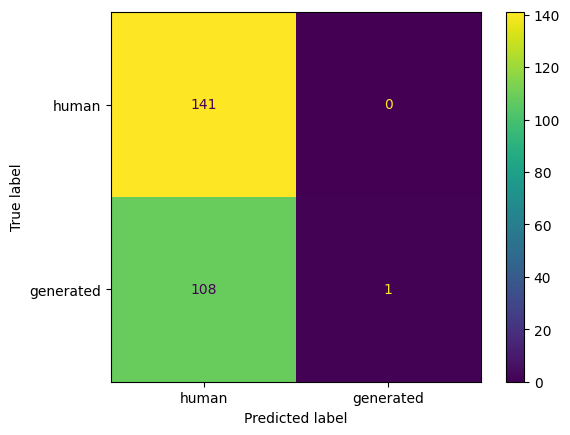

In [13]:
pred_y = [0 if (pred < 0.5) else 1 for pred in model_RNN.predict(test_x)]

from sklearn.metrics import accuracy_score
print('accuracy: '+ str(accuracy_score(pred_y, test_y)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
cmd = ConfusionMatrixDisplay(confusion_matrix(test_y, pred_y), display_labels=['human', 'generated'])
cmd.plot()

# Generate a classification report
report = classification_report(test_y, pred_y)

# Print the classification report
print(report)

In [14]:
pred_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [15]:
test_y

2213    1.0
2072    1.0
1394    0.0
2152    1.0
1058    0.0
       ... 
651     1.0
353     1.0
170     1.0
1505    1.0
1938    1.0
Name: output, Length: 250, dtype: float64

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from gensim.models import Word2Vec
import numpy as np

train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

train_tf = tf.data.Dataset.from_tensor_slices((train_x, train_y))
valid_tf = tf.data.Dataset.from_tensor_slices((valid_x, valid_y))
test_tf = tf.data.Dataset.from_tensor_slices((test_x, test_y))

train_dataset = train_tf.shuffle(buffer_size=10000).batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
test_dataset = test_tf.batch(batch_size=64).prefetch(tf.data.AUTOTUNE)
# Train Word2Vec embeddings
corpus = [text.split() for text in train_x]
word2vec_model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Get the embedding matrix
embedding_matrix = word2vec_model.wv.vectors

vectorizer = TextVectorization(max_tokens=len(word2vec_model.wv), output_sequence_length=500)
train_text = train_dataset.map(lambda text, label: text)
vectorizer.adapt(train_text)

# Create an embedding layer with pre-trained Word2Vec weights
embedding_layer = tf.keras.layers.Embedding(
    input_dim=len(word2vec_model.wv),
    output_dim=word2vec_model.vector_size,
    weights=[embedding_matrix],
    trainable=False
)

model_RNN_Word2Vec = tf.keras.Sequential([
    vectorizer,
    embedding_layer,
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_RNN_Word2Vec.summary()

model_RNN_Word2Vec.compile(loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam(1e-4))
model_RNN_Word2Vec.fit(train_dataset, epochs=20, validation_data=valid_dataset, validation_steps=20, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))
test_loss_rnn_word2vec, test_acc_rnn_word2vec = model_RNN_Word2Vec.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (Text  (None, 500)               0         
 Vectorization)                                                  
                                                                 
 embedding_1 (Embedding)     (None, 500, 100)          2265700   
                                                                 
 bidirectional_1 (Bidirecti  (None, 500, 128)          84480     
 onal)                                                           
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                      

32/32 [==============================] - 12s 142ms/step - loss: 0.6829 - accuracy: 0.5666 - val_loss: 0.6473 - val_accuracy: 0.8000
Epoch 2/20
32/32 [==============================] - ETA: 0s - loss: 0.6372 - accuracy: 0.6602

32/32 [==============================] - 2s 64ms/step - loss: 0.6372 - accuracy: 0.6602
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 0.5977 - accuracy: 0.7127

32/32 [==============================] - 2s 61ms/step - loss: 0.5977 - accuracy: 0.7127
Epoch 4/20
32/32 [==============================] - ETA: 0s - loss: 0.5618 - accuracy: 0.7142

32/32 [==============================] - 2s 61ms/step - loss: 0.5618 - accuracy: 0.7142
Epoch 5/20
32/32 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.7350

32/32 [==============================] - 3s 79ms/step - loss: 0.5303 - accuracy: 0.7350
Epoch 6/20
32/32 [==============================] - ETA: 0s - loss: 0.5102 - accuracy: 0.7454

32/32 [==============================] - 4s 112ms/step - loss: 0.5102 - accuracy: 0.7454
Epoch 7/20
32/32 [==============================] - ETA: 0s - loss: 0.5008 - accuracy: 0.7444

32/32 [==============================] - 4s 114ms/step - loss: 0.5008 - accuracy: 0.7444
Epoch 8/20
32/32 [==============================] - ETA: 0s - loss: 0.4953 - accuracy: 0.7420

32/32 [==============================] - 4s 118ms/step - loss: 0.4953 - accuracy: 0.7420
Epoch 9/20
32/32 [==============================] - ETA: 0s - loss: 0.4814 - accuracy: 0.7632

32/32 [==============================] - 4s 111ms/step - loss: 0.4814 - accuracy: 0.7632
Epoch 10/20
32/32 [==============================] - ETA: 0s - loss: 0.4781 - accuracy: 0.7628

32/32 [==============================] - 4s 115ms/step - loss: 0.4781 - accuracy: 0.7628
Epoch 11/20
32/32 [==============================] - ETA: 0s - loss: 0.4760 - accuracy: 0.7608

32/32 [==============================] - 4s 115ms/step - loss: 0.4760 - accuracy: 0.7608
Epoch 12/20
32/32 [==============================] - ETA: 0s - loss: 0.4641 - accuracy: 0.7766

32/32 [==============================] - 3s 102ms/step - loss: 0.4641 - accuracy: 0.7766
Epoch 13/20
32/32 [==============================] - ETA: 0s - loss: 0.4539 - accuracy: 0.7796

32/32 [==============================] - 4s 115ms/step - loss: 0.4539 - accuracy: 0.7796
Epoch 14/20
32/32 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.7920

32/32 [==============================] - 3s 79ms/step - loss: 0.4355 - accuracy: 0.7920
Epoch 15/20
32/32 [==============================] - ETA: 0s - loss: 0.4291 - accuracy: 0.7984

32/32 [==============================] - 3s 99ms/step - loss: 0.4291 - accuracy: 0.7984
Epoch 16/20
32/32 [==============================] - ETA: 0s - loss: 0.4097 - accuracy: 0.8162

32/32 [==============================] - 2s 73ms/step - loss: 0.4097 - accuracy: 0.8162
Epoch 17/20
32/32 [==============================] - ETA: 0s - loss: 0.3879 - accuracy: 0.8197

32/32 [==============================] - 2s 61ms/step - loss: 0.3879 - accuracy: 0.8197
Epoch 18/20
32/32 [==============================] - ETA: 0s - loss: 0.3885 - accuracy: 0.8242

32/32 [==============================] - 2s 61ms/step - loss: 0.3885 - accuracy: 0.8242
Epoch 19/20
32/32 [==============================] - ETA: 0s - loss: 0.3724 - accuracy: 0.8341

32/32 [==============================] - 2s 62ms/step - loss: 0.3724 - accuracy: 0.8341
Epoch 20/20
32/32 [==============================] - ETA: 0s - loss: 0.3687 - accuracy: 0.8385

4/4 [==============================] - 0s 44ms/step - loss: 0.3559 - accuracy: 0.8440
Test Loss: 0.6441073417663574
Test Accuracy: 0.5680000185966492


In [31]:
model_RNN_Word2Vec.save('/content/drive/MyDrive/TELUGU DATA SETS/model.savedmodel', save_format='tf')

In [29]:
model.save("/content/drive/MyDrive/PROGRESS-REPORT/model_RNN_Word2Vec.compile.pth")

NameError: name 'model' is not defined

In [26]:
model_RNN_Word2Vec.save('model.savedmodel', save_format='tf')


In [18]:
# Save the trained model as an HDF5 file
model_RNN_Word2Vec.save('/content/drive/MyDrive/RESEARCH -DATA 2023/model_RNN_Word2Vec.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


NotImplementedError: Save or restore weights that is not an instance of `tf.Variable` is not supported in h5, use `save_format='tf'` instead. Received a model or layer TextVectorization with weights [<keras.src.layers.preprocessing.index_lookup.VocabWeightHandler object at 0x7b8d047febc0>]

8/8 [==============================] - 0s 38ms/step
accuracy: 0.836
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.87       141
         1.0       0.90      0.71      0.79       109

    accuracy                           0.84       250
   macro avg       0.85      0.82      0.83       250
weighted avg       0.84      0.84      0.83       250



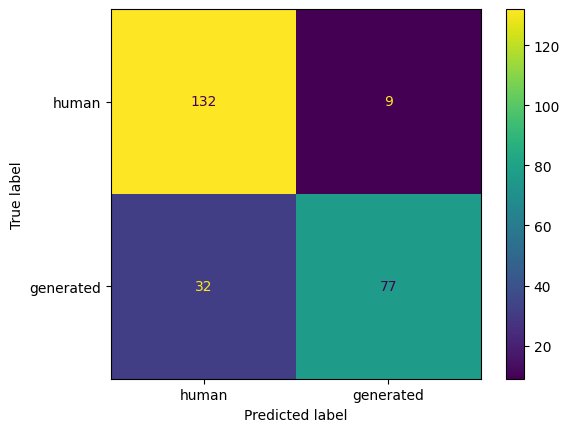

In [ ]:
pred_y = [0 if (pred < 0.5) else 1 for pred in model_RNN_Word2Vec.predict(test_x)]

from sklearn.metrics import accuracy_score
print('accuracy: '+ str(accuracy_score(pred_y, test_y)))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
cmd = ConfusionMatrixDisplay(confusion_matrix(test_y, pred_y), display_labels=['human', 'generated'])
cmd.plot()

# Generate a classification report
report = classification_report(test_y, pred_y)

# Print the classification report
print(report)

In [ ]:
data['input']

0       california is the biggest example of city plan...
1       a life without cars sure sounds like a great i...
2       cars are used used in everyday life but they m...
3       the electoral collage should be disbanded not ...
4       dear mrmrs senator the electoral college is a ...
                              ...                        
2489    dear florida senator it is in the interest of ...
2490    driving can be a huge hassle having to spend m...
2491    dear\nsenator\n\ni am writing to express my op...
2492    the electoral college is pointless i believe t...
2493    although the usage of motorized vehicles such ...
Name: input, Length: 2494, dtype: object

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)

predictions_rnn = model_RNN.predict(test_x)
predictions_rnn_word2vec = model_RNN_Word2Vec.predict(test_x)

# Define the threshold
threshold = 0.5

8/8 [==============================] - 0s 26ms/step


In [ ]:
test_y.shape

(250,)

In [ ]:
predictions_rnn_word2vec

array([[0.9300745 ],
       [0.91696566],
       [0.09753364],
       [0.9191191 ],
       [0.15136471],
       [0.8152398 ],
       [0.7164822 ],
       [0.17433251],
       [0.15153717],
       [0.16246791],
       [0.00857545],
       [0.19357151],
       [0.6926293 ],
       [0.88718486],
       [0.01454981],
       [0.09101385],
       [0.01773881],
       [0.17631897],
       [0.1509429 ],
       [0.03217444],
       [0.15559706],
       [0.88343346],
       [0.16557033],
       [0.18310635],
       [0.22004539],
       [0.9055367 ],
       [0.009813  ],
       [0.16012648],
       [0.01506396],
       [0.68450785],
       [0.3585442 ],
       [0.1498982 ],
       [0.96829087],
       [0.9222342 ],
       [0.6528068 ],
       [0.7934079 ],
       [0.01445553],
       [0.16663867],
       [0.1922052 ],
       [0.01264328],
       [0.61732996],
       [0.6535935 ],
       [0.04833796],
       [0.08704979],
       [0.06529018],
       [0.07936358],
       [0.6848732 ],
       [0.886

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

train_x, test_x, train_y, test_y = train_test_split(data['input'], data['output'], test_size=0.1, random_state=42)

# Creating a Pipeline with only TfidfVectorizer
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

# Fitting the Model
model_LR = pipeline.fit(train_x, train_y)

# Making Predictions
predicted_LR = model_LR.predict(test_x)

# Evaluating the Model
accuracy_LR = accuracy_score(test_y, predicted_LR)
print("Accuracy (Logistic Regression):", accuracy_LR)
print(classification_report(test_y, predicted_LR))

Accuracy (Logistic Regression): 0.944
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95       141
         1.0       0.99      0.88      0.93       109

    accuracy                           0.94       250
   macro avg       0.95      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250



In [ ]:
predicted_LR

array([1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1.

In [ ]:
test_y

2213    1.0
2072    1.0
1394    0.0
2152    1.0
1058    0.0
       ... 
651     1.0
353     1.0
170     1.0
1505    1.0
1938    1.0
Name: output, Length: 250, dtype: float64

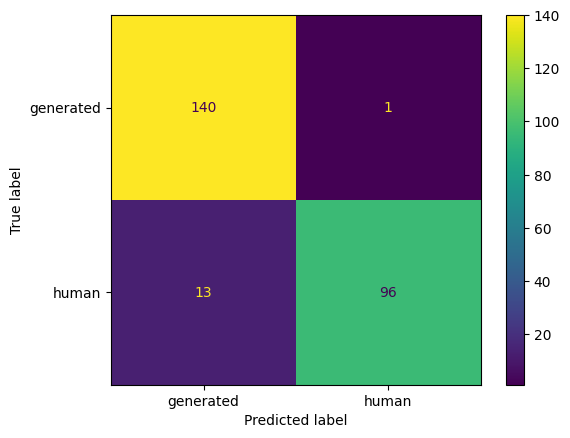

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cmd = ConfusionMatrixDisplay(confusion_matrix(test_y, predicted_LR), display_labels=['generated', 'human'])
cmd.plot()